In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [2]:
df = pd.read_csv('data.csv')
x_coords = df['XCOORD'].tolist()
y_coords = df['YCOORD'].tolist()

In [3]:
num_customers = len(df)
distance_matrix = np.zeros((num_customers, num_customers))

for i in range(num_customers):
    for j in range(num_customers):
        if i != j:
            distance_matrix[i][j] = np.sqrt((x_coords[i] - x_coords[j]) ** 2 + (y_coords[i] - y_coords[j]) ** 2)

In [4]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_customers), num_customers)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [40]:
random.seed(42)
np.random.seed(42)
def evaluate_tsp(individual):
    total_distance = 0
    for i in range(len(individual) - 1):
        total_distance += distance_matrix[individual[i]][individual[i + 1]]
    total_distance += distance_matrix[individual[-1]][individual[0]]  # Return to starting point
    return total_distance,

toolbox.register("evaluate", evaluate_tsp)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=800)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)

best = tools.selBest(population, k=1)[0]
best_distance = evaluate_tsp(best)[0]

gen_res = []
gen, max_gen = 0, 1000
while gen < max_gen:
    gen += 1
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring + population, k=len(population))
    hof.update(population)
    best = tools.selBest(population, k=1)[0]
    best_distance = evaluate_tsp(best)[0]
    gen_res.append(best_distance)
best_distance

476.90690678291446

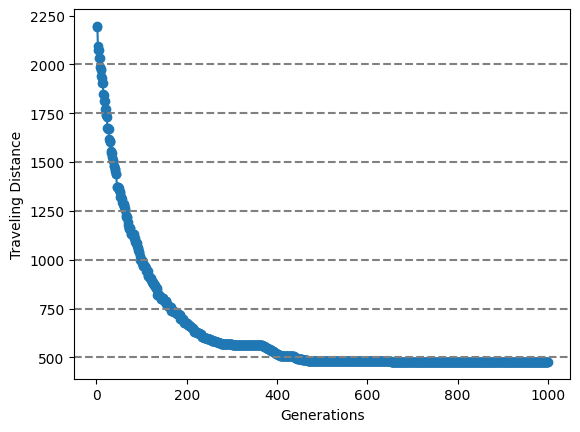

In [43]:
generations = list(range(1, 1001))
plt.plot(generations, gen_res, marker='o', linestyle='-')
for i in range(500, 2250, 250):
    plt.axhline(y=i, color='gray', linestyle='--')
plt.xlabel('Generations')
plt.ylabel('Traveling Distance')
plt.savefig("fig4.png")
plt.show()

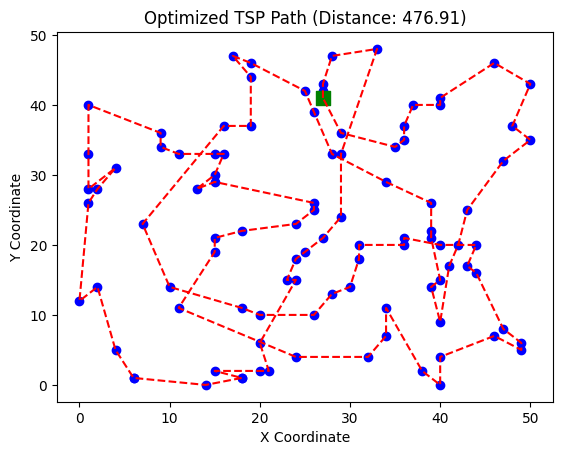

In [44]:
optimized_path = list(best)

optimized_x = [x_coords[i] for i in optimized_path]
optimized_y = [y_coords[i] for i in optimized_path]

optimized_x.append(optimized_x[0])
optimized_y.append(optimized_y[0])

plt.scatter(optimized_x, optimized_y, marker='o', color='b')
plt.plot(optimized_x, optimized_y, linestyle='dashed', color='r')
plt.scatter(optimized_x[0], optimized_y[0], marker='s', color='g', s=100, label='Start')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Optimized TSP Path (Distance: {best_distance:.2f})')
plt.savefig("fig5.png")
plt.show()

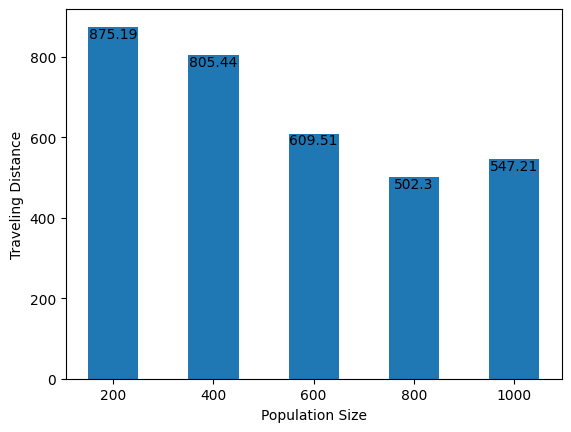

In [21]:
import matplotlib.pyplot as plt
res = [875.19, 805.44, 609.51, 502.30, 547.21]
pop = ['200', '400', '600', '800', '1000']
plt.bar(pop, res, width=0.5)
plt.xlabel("Population Size")
plt.ylabel("Traveling Distance")
for i, res1 in enumerate(res):
    plt.text(i, res1, str(res1), ha='center', va='top')
plt.savefig("fig2.png")
plt.show()

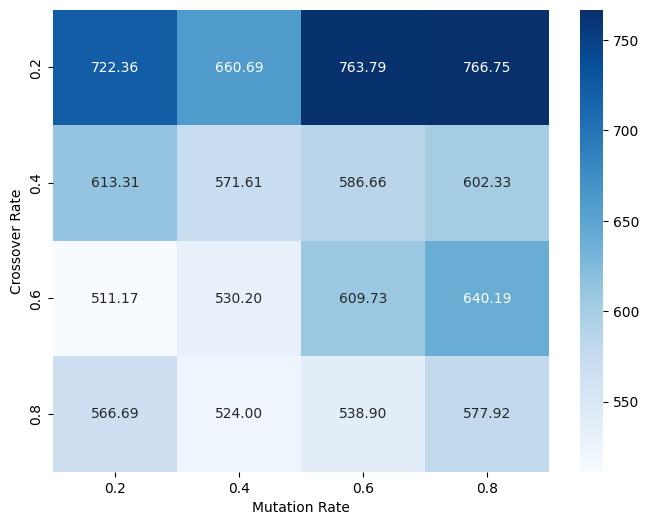

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cross_rate = [0.2, 0.4, 0.6, 0.8]
mutation_rate = [0.2, 0.4, 0.6, 0.8]
res_matrix = [[722.36, 660.69, 763.79, 766.75], [613.31, 571.61, 586.66, 602.33], [511.17, 530.20, 609.73, 640.19], [566.69, 524.00, 538.90, 577.92]]
grid_array = np.array(res_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(grid_array, annot=True, fmt=".2f", cmap='Blues', xticklabels=mutation_rate, yticklabels=cross_rate)
plt.ylabel("Crossover Rate")
plt.xlabel("Mutation Rate")
plt.savefig("fig3.png")
plt.show()